In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 보스턴 주택 데이터셋
from sklearn import datasets
housing = datasets.load_boston()

# key 값 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
# pandas dataframe으로 변환
data = pd.DataFrame(housing['data'], columns = housing['feature_names'])
target = pd.DataFrame(housing['target'], columns = ['Target'])

# 데이터 셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [3]:
# 데이터 프레임 결합 - data와 target
df = pd.concat([data, target], axis = 1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

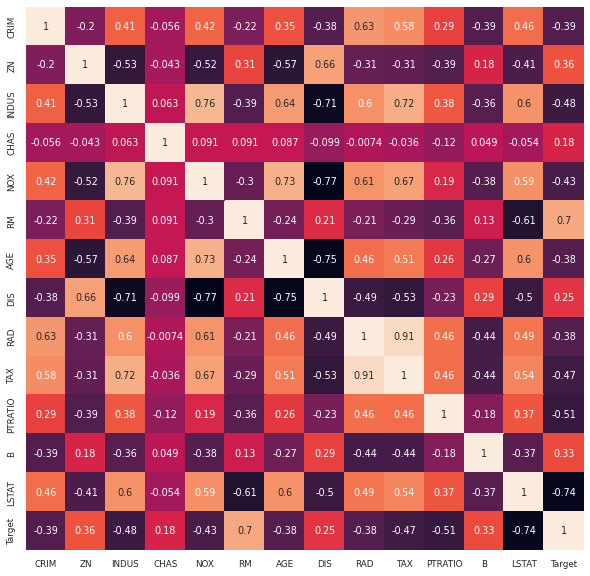

In [6]:
# 상관관계 분석
df_corr = df.corr()

plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [7]:
# target 변수와 상관관계가 높은 순으로 출력
corr_order = df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [8]:
# 시각화로 분석할 feature 선택 추출
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:,plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


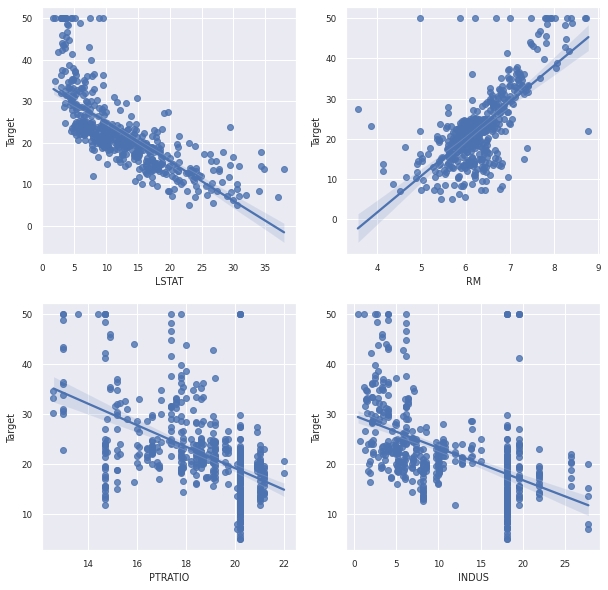

In [9]:
# regplot으로 선형회귀선 표시
plt.figure(figsize = (10, 10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx + 1)
    sns.regplot(x = col, y = plot_cols[0], data = plot_df, ax = ax1)
plt.show() 

In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:, :-1] # 마지막 열인 target을 제외하고 스케일러를 돌림
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영함
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [11]:
# 학습 데이터와 테스트 데이터를 분할함
from sklearn.model_selection import train_test_split
x_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, 'Target']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, random_state = 12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [12]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print("회귀계수(기울기): ", np.round(lr.coef_, 1))
print("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [-23.2  25.4]
상수항(절편):  16.3


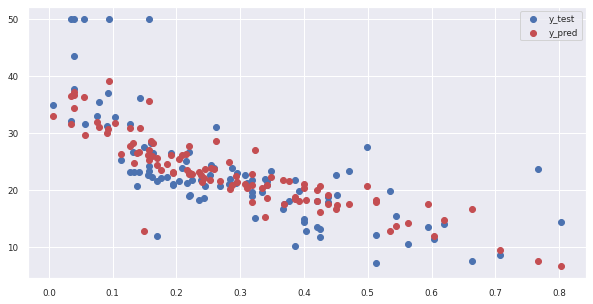

In [13]:
# 예측값 저장
y_test_pred = lr.predict(x_test)

# 예측값과 실제값의 분포
plt.figure(figsize = (10, 5)) # 표 크기 지정
plt.scatter(x_test['LSTAT'], y_test, label = 'y_test') # 파란 점 = 실제 값
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label = 'y_pred') # 빨간 점 = 예측 값
plt.legend(loc = 'best') # 범례가 표시되는 위치 지정
plt.show()

In [14]:
# 성능 평가 - MSE 사용
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred) # 훈련 데이터의 평가 점수
print("Train MSE: %.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 30.8042
Test MSE: 29.5065


In [15]:
from google.colab import files
myfile = files.upload()

Saving housing.data.txt to housing.data.txt


In [16]:
#io와 pandas 모듈 import
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(myfile["housing.data.txt"]), header = None, sep='\s+')

In [17]:
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


기울기: 9.102
절편: -34.671


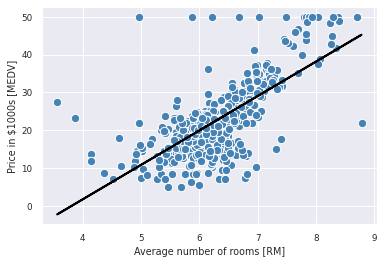

In [18]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
slr = LinearRegression(fit_intercept = True)
X = df[['RM']].values
y = df[['MEDV']].values
slr.fit(X, y)
print("기울기: %.3f" % slr.coef_[0])
print("절편: %.3f" % slr.intercept_)

import matplotlib.pyplot as plt
plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
plt.plot(X, slr.predict(X), color = 'black', lw = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

In [19]:
# RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials = 100, min_samples = 50,
                        loss = 'absolute_loss', residual_threshold = 5.0, random_state = 0)

# 선형 회귀분석 수행함
ransac.fit(X, y)

# 데이터가 오차 범위 내에 있는지 여부를 저장하는 배열을 가져와서 저장함
inlier_mask = ransac.inlier_mask_

# 배열의 값을 반대로 만들어서 저장함
outlier_mask = np.logical_not(inlier_mask)

# 그래프를 그릴 범위 설정함
line_X = np.arange(3, 10, 1)

# 그릴 범위에 해당하는 데이터의 예측 값을 가져옴
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

기울기: 10.735
절편: -44.089


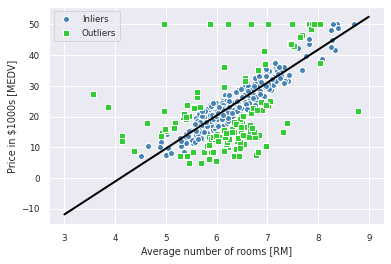

In [20]:
# 실제 데이터를 산점도로 표현함
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'limegreen', edgecolor='white', marker='s', label='Outliers')

# 예측 모델을 선 그래프로 표현함
plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc = 'upper left')

print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)
plt.show()

In [21]:
x = np.linspace(-10, 10)
print("input\n", x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

output = sigmoid(x)
print("output\n", output)

threshold = 0.5
print(len(output))

input
 [-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
output
 [4.53978687e-05 6.82792246e-05 1.02692018e-04 1.54446212e-04
 2.32277160e-04 3.49316192e-04 5.25297471e-04 7.89865942e-04
 1.18752721e-03 1.78503502e-03 2.68237328e-03 4.02898336e-03
 6.04752187e-03 9.06814944e-03 1.35769169e-02 2.02816018e-02
 3.01959054e-02 4.47353464e-02 6.58005831e-02 9.57904660e-02
 1.37437932e-01 1.9

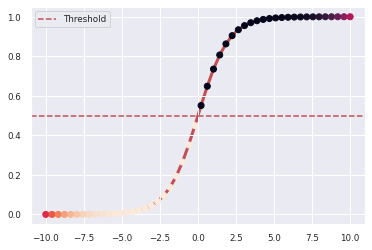

In [22]:
clfied_1 = output[output >= 0.5]
clfied_0 = output[output < 0.5]

plt.plot(x, output, color = "r", linewidth = 3, zorder = 0)

plt.scatter(x, output, c = [clfied_1, clfied_0])

plt.axhline(0.5, color = "r", linestyle = "--", label = "Threshold")
plt.legend()
plt.show()

In [23]:
# Logistic Regression으로 유방암 유무 예측
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

압축 전의 shape
 (569, 30)
압축 후의 shape
 (569, 1)


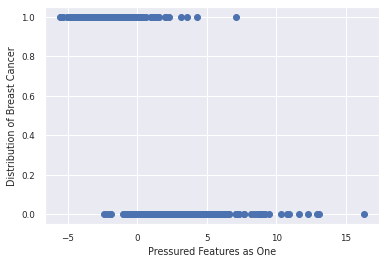

In [24]:
# 데이터 분포 확인
# 전처리 - 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
print("압축 전의 shape\n", data_scaled.shape)

# 전처리 - feature 압축
# feature가 여러 개여서 단일 변수에 대한 분포를 확인하기 힘듦
# 여러 변수의 특성을 고려해 압축한 하나의 feature로 만듦
# 주성분 분석 (Primary Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
print("압축 후의 shape\n", pca_data.shape)

# 시각화
plt.scatter(pca_data, cancer.target)
plt.xlabel('Pressured Features as One')
plt.ylabel('Distribution of Breast Cancer')
plt.show()

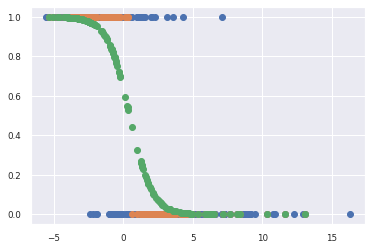

In [25]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행
from sklearn.linear_model import LogisticRegression

# 전처리 - train / test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(pca_data, cancer.target, test_size = 0.3, random_state = 0)

# 모델 학습 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# predict_proba로 모델이 예측한 확률값 반환
lr_proba = lr_clf.predict_proba(X_test)

# 주어진 데이터의 원래 분포
plt.scatter(pca_data, cancer.target)

# 주황색: logistic regression이 분류한 값
plt.scatter(X_test, lr_preds)

# 초록색: logistic regression이 예측한 확률
plt.scatter(X_test, lr_proba[:, 1])
plt.show()

In [26]:
# accuracy와 roc_auc 측정
from sklearn.metrics import accuracy_score, roc_auc_score

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.895
roc_auc: 0.890


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

model = Sequential()
# 입력 1개를 받아 출력 1개를 return하는 선형 회귀 레이어를 생성
model.add(Dense(input_dim = 1, units = 1))

# 선형 회귀의 출력값을 시그모이드에 연결
model.add(Activation('sigmoid'))

# 크로스 엔트로피를 비용함수로 설정해 경사하강법으로 학습함
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['binary_accuracy'])

In [28]:
# 데이터 생성
X = np.array([-2, -1.5, -1, 1.25, 1.62, 2])
Y = np.array([0, 0, 0, 1, 1, 1])

model.fit(X, Y, epochs = 300, verbose = 0)

In [29]:
model.predict([-2, -1.5, -1, 1.25, 1.62, 2])

array([[0.09120044],
       [0.15070638],
       [0.23883483],
       [0.80311704],
       [0.86148584],
       [0.90558493]], dtype=float32)

In [30]:
# 시그모이드 특성상 왼쪽 극한 값은 0, 오른쪼 극한 값은 1로 수렴
model.predict([-1000, 1000])

array([[0.],
       [1.]], dtype=float32)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1399863]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.01909201], dtype=float32)>]

In [33]:
model.layers[0].get_weights()

[array([[1.1399863]], dtype=float32), array([-0.01909201], dtype=float32)]

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('train data(count, row, column: ' + str(X_train.shape))
print('test data(count, row, column: ' + str(X_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
train data(count, row, column: (60000, 28, 28)
test data(count, row, column: (10000, 28, 28)


In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('train target (count): ' + str(y_train.shape))
print('test target (count): ' + str(y_test.shape))


train target (count): (60000,)
test target (count): (10000,)


In [36]:
print('sample from train: ' + str(y_train[0]))
print('sample from test: ' + str(y_test[0]))

sample from train: 5
sample from test: 7


In [37]:
input_dim = 784
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [38]:
# One Hot Encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
# Softmax 구현
model = Sequential()
model.add(Dense(input_dim = input_dim, units = 10, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 2048, epochs = 100, verbose = 0)

In [40]:
model.predict(X_train)[0]

array([2.5956336e-02, 8.6970039e-04, 1.2861802e-02, 4.0623602e-01,
       3.3053293e-04, 5.0048566e-01, 9.3114516e-03, 1.7803743e-02,
       1.6842369e-02, 9.3023842e-03], dtype=float32)

In [41]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.8893
Test accuracy:  0.8892999887466431


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.layers[0].weights

[<tf.Variable 'dense_1/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05399805,  0.08475921, -0.01192407, ...,  0.07844023,
         -0.07295835,  0.00733945],
        [-0.05123434, -0.04436978, -0.00353144, ..., -0.06520021,
         -0.0125543 , -0.06649537],
        [ 0.0331803 , -0.08192123,  0.06313995, ...,  0.04997673,
          0.01546816,  0.03610323],
        ...,
        [ 0.02215113, -0.03652403,  0.08466981, ..., -0.03105933,
          0.03478344,  0.02004027],
        [ 0.01712968,  0.07983571,  0.07517099, ..., -0.04042915,
          0.05995824, -0.06576842],
        [-0.04706009,  0.01565728,  0.01273476, ..., -0.07701997,
          0.06999234, -0.02767302]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.09076989,  0.16633917, -0.03028584, -0.05280821,  0.05347943,
         0.15485494, -0.0116267 ,  0.10123099, -0.25567338, -0.03474024],
       dtype=float32)>]

In [44]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [46]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [49]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [51]:
# Train과 Test 데이터 분리
# Training Data 70% / Test data 30%로 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [52]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [55]:
# Linear Regression VS Ridge vs Lasso 비교

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression(n_jobs = -1)
model_LR.fit(X_train, y_train)
pd.DataFrame(model_LR.coef_, index = X.columns, columns = ['Linear regression 계수'])


,Linear regression 계수
CRIM,-0.838843
ZN,1.428401
INDUS,0.405327
CHAS,0.679425
NOX,-2.530391
RM,1.933816
AGE,0.100907
DIS,-3.236154
RAD,2.703183
TAX,-1.917299


In [56]:
# Hyperparameter 임의로 지정

model_Ridge1 = Ridge(alpha = 0.01, random_state = 1)
model_Ridge2 = Ridge(alpha = 1.0, random_state = 1)
model_Lasso1 = Lasso(alpha = 0.01, random_state = 1)
model_Lasso2 = Lasso(alpha = 1.0, random_state = 1)

model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)
model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

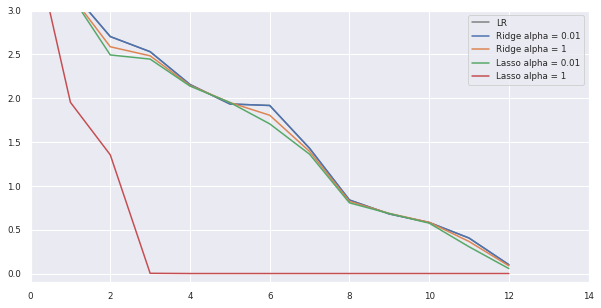

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label = 'LR', c = 'gray')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label = 'Ridge alpha = 0.01')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label = 'Ridge alpha = 1')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label = 'Lasso alpha = 0.01')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label = 'Lasso alpha = 1')
plt.legend()
plt.ylim((-0.1, 3))
plt.xlim((0, 14))
plt.show()

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [60]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df['target'] = cancer.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
X, y = df.iloc[:, :30].values, df.iloc[:,30].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)



In [63]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [65]:
lr2_10 = LogisticRegression(penalty = 'l2', C = 10.0)
lr2_1 = LogisticRegression(penalty = 'l2', C = 1.0)
lr2_0_1 = LogisticRegression(penalty = 'l2', C= 0.1)
lr1_10 = LogisticRegression(penalty = 'l1', C = 10.0, solver = 'liblinear')
lr1_1 = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
lr1_0_1 = LogisticRegression(penalty = 'l1', C= 0.1, solver = 'liblinear')

In [67]:
lr2_10.fit(X_train_std, y_train)
print('Training accuracy with L2 and lambda = 0.1', lr2_10.score(X_train_std, y_train))
print('Test accuracy with L2 and lambda = 0.1', lr2_10.score(X_test_std, y_test))
print('-' * 90)

lr2_1.fit(X_train_std, y_train)
print('Training accuracy with L2 and lambda = 1', lr2_1.score(X_train_std, y_train))
print('Test accuracy with L2 and lambda = 1', lr2_1.score(X_test_std, y_test))
print('-' * 90)

lr2_0_1.fit(X_train_std, y_train)
print('Training accuracy with L2 and lambda = 10', lr2_0_1.score(X_train_std, y_train))
print('Test accuracy with L2 and lambda = 10', lr2_0_1.score(X_test_std, y_test))
print('-' * 90)

print('Training accuracy with L2 and lambda = 1', lr2_1.score(X_train_std, y_train))
print('Test accuracy with L2 and lambda = 1', lr2_1.score(X_test_std, y_test))
print('-' * 90)

lr1_10.fit(X_train_std, y_train)
print('Training accuracy with L1 and lambda = 0.1', lr1_10.score(X_train_std, y_train))
print('Test accuracy with L1 and lambda = 0.1', lr1_10.score(X_test_std, y_test))
print('-' * 90)

lr1_1.fit(X_train_std, y_train)
print('Training accuracy with L1 and lambda = 1', lr1_1.score(X_train_std, y_train))
print('Test accuracy with L1 and lambda = 1', lr1_1.score(X_test_std, y_test))
print('-' * 90)

lr1_0_1.fit(X_train_std, y_train)
print('Training accuracy with L1 and lambda = 10', lr1_0_1.score(X_train_std, y_train))
print('Test accuracy with L1 and lambda = 10', lr1_0_1.score(X_test_std, y_test))
print('-' * 90)

Training accuracy with L2 and lambda = 0.1 0.9949748743718593
Test accuracy with L2 and lambda = 0.1 0.9649122807017544
------------------------------------------------------------------------------------------
Training accuracy with L2 and lambda = 1 0.992462311557789
Test accuracy with L2 and lambda = 1 0.9590643274853801
------------------------------------------------------------------------------------------
Training accuracy with L2 and lambda = 10 0.9849246231155779
Test accuracy with L2 and lambda = 10 0.9532163742690059
------------------------------------------------------------------------------------------
Training accuracy with L2 and lambda = 1 0.992462311557789
Test accuracy with L2 and lambda = 1 0.9590643274853801
------------------------------------------------------------------------------------------
Training accuracy with L1 and lambda = 0.1 0.992462311557789
Test accuracy with L1 and lambda = 0.1 0.9649122807017544
-------------------------------------------------

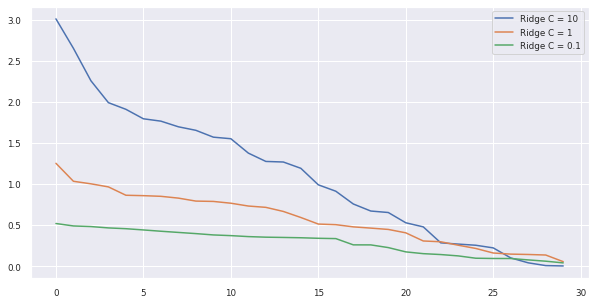

In [68]:
# C의 변화에 따른 Logistic Regression(Ridge)의 회귀계수 변화
plt.figure(figsize=(10,5))
plt.plot(sorted(np.abs(lr2_10.coef_)[0])[::-1], label = 'Ridge C = 10')
plt.plot(sorted(np.abs(lr2_1.coef_)[0])[::-1], label = 'Ridge C = 1')
plt.plot(sorted(np.abs(lr2_0_1.coef_)[0])[::-1], label = 'Ridge C = 0.1')
plt.legend()
plt.show()

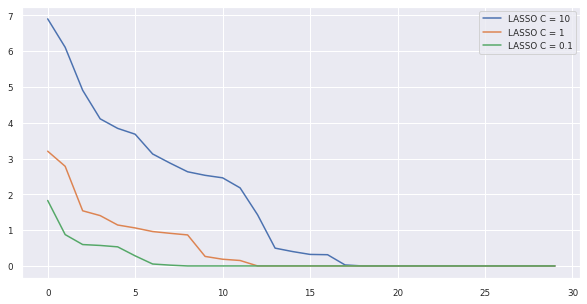

In [70]:
plt.figure(figsize = (10, 5))
plt.plot(sorted(np.abs(lr1_10.coef_)[0])[::-1], label = 'LASSO C = 10')
plt.plot(sorted(np.abs(lr1_1.coef_)[0])[::-1], label = 'LASSO C = 1')
plt.plot(sorted(np.abs(lr1_0_1.coef_)[0])[::-1], label = 'LASSO C = 0.1')
plt.legend()
plt.show()